In [1]:
!pip3 install plotly
!pip3 install --upgrade nbformat

  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached narwhals-1.30.0-py3-none-any.whl.metadata (11 kB)
Using cached plotly-6.0.0-py3-none-any.whl (14.8 MB)
Using cached narwhals-1.30.0-py3-none-any.whl (313 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.21.1-py3-none-any.whl (23 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl (18 kB)
Using cached referencing-0.36.2-py3-none-any.w

In [2]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import torch
import matplotlib.pyplot as plt
from scipy.linalg import hadamard
from block import block, generators, plot
import math
import numpy as np
import pandas as pd
import plotly.express as px



/opt/anaconda3/envs/cse446/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [56]:
# Generate data points
X = [0]#np.linspace(-4, 4, 10)
Y = [0]#np.linspace(-4, 4, 10)
Theta = np.linspace(-180, 180, 60)
F = []

a = generators.gen_rand_block(10, lambda: 0.25)
b = a.mate()
x_flat = []
y_flat = []
theta_flat = []
f_flat = []
i = 0
for theta in Theta:
    cpyt = b.clone()
    cpyt.rotate(theta)
    for x in X:
        cpyx = cpyt.clone()
        cpyx.translate(torch.tensor([float(x), 0]))
        for y in Y:
            cpyy = cpyx.clone()
            cpyy.translate(torch.tensor([0, float(y)]))
            A, force = a.calculate_attraction(cpyy)
            f_flat.append((force.item() + 10))
            x_flat.append(x)
            y_flat.append(y)
            theta_flat.append(theta)
            i += 1

# Create DataFrame
df = pd.DataFrame({
    'x': x_flat,
    'y': y_flat,
    'theta': theta_flat,
    'f': f_flat
})

# Plot 3D scatter plot
fig = px.scatter_3d(df, x='x', y='y', z='theta', color='f', size='f', size_max=10)
fig.update_layout(title='3D Scatter Plot of f(x, y, theta)')
fig.update_traces(marker=dict(size=1))  # Adjust size as needed
fig.show()


In [3]:
hadamard(2)


array([[ 1,  1],
       [ 1, -1]])

In [5]:
a = generators.gen_had_block(2)
print(a) # print object
points, polarities, radii = a.as_tuple() # easily access all attributes

points:
 tensor([[-0.5000, -0.5000],
        [-0.5000,  0.5000],
        [ 0.5000, -0.5000],
        [ 0.5000,  0.5000]]),
 polarities:
 tensor([ 1,  1,  1, -1]),
 radii:
 tensor([0.5000, 0.5000, 0.5000, 0.5000]),
 numel:
 4


In [6]:
b = a.clone() # create a copy
print(b.polarities)
c = b.mate() # create a mate (all N => S, and all S => N poles)
print(c.polarities)

tensor([ 1,  1,  1, -1])
tensor([-1, -1, -1,  1])


tensor([[0.7854, 0.0000, 0.0000, -0.0000],
        [0.0000, 0.7854, 0.0000, -0.0000],
        [0.0000, 0.0000, 0.7854, -0.0000],
        [-0.0000, -0.0000, -0.0000, 0.7854]]) tensor(3.1416)
tensor([[-0.7854, -0.0000, -0.0000,  0.0000],
        [-0.0000, -0.7854, -0.0000,  0.0000],
        [-0.0000, -0.0000, -0.7854,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -0.7854]]) tensor(-3.1416)


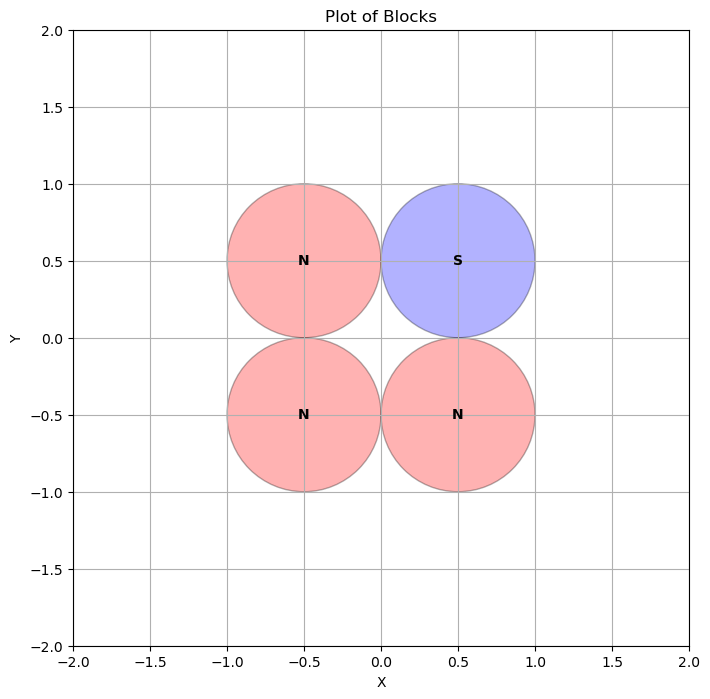

In [7]:
A, F = a.calculate_attraction(b) # get matrix of forces for each magent, and total force
print(A, F)

A, F = a.calculate_attraction(c) # with mate
print(A, F)

plot.plot_faces([a])

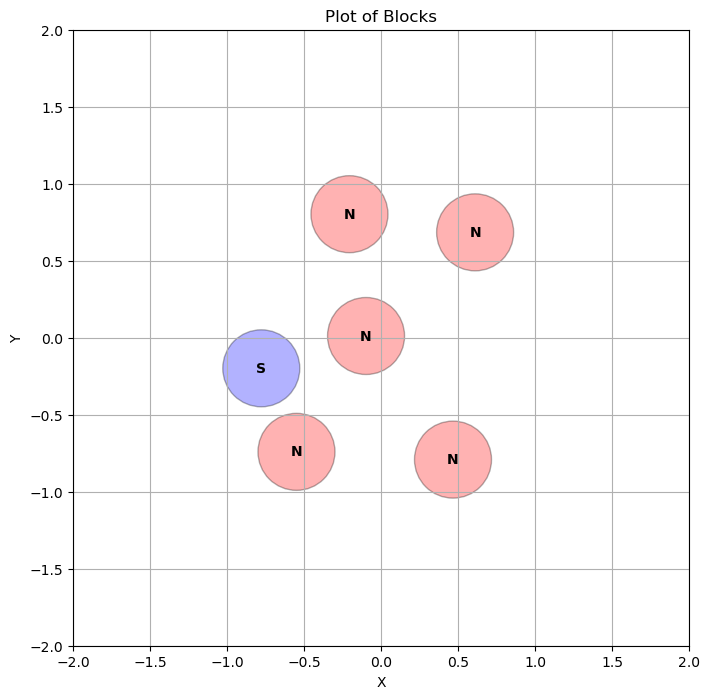

In [9]:
c = generators.gen_rand_block(6, lambda: 0.25)
d = c.mate()
# c.rotate(30)
plot.plot_faces([c])

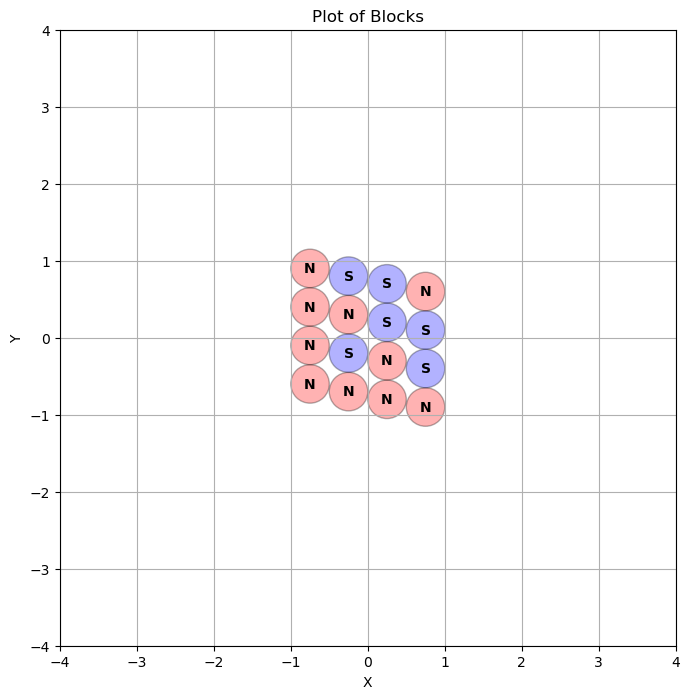

In [10]:
w = generators.gen_had_block(4)
A = torch.tensor([[1.0,-0.2],[0.0,1.0]])
w.transform(A)
plot.plot_faces([w], zoom_factor=4)

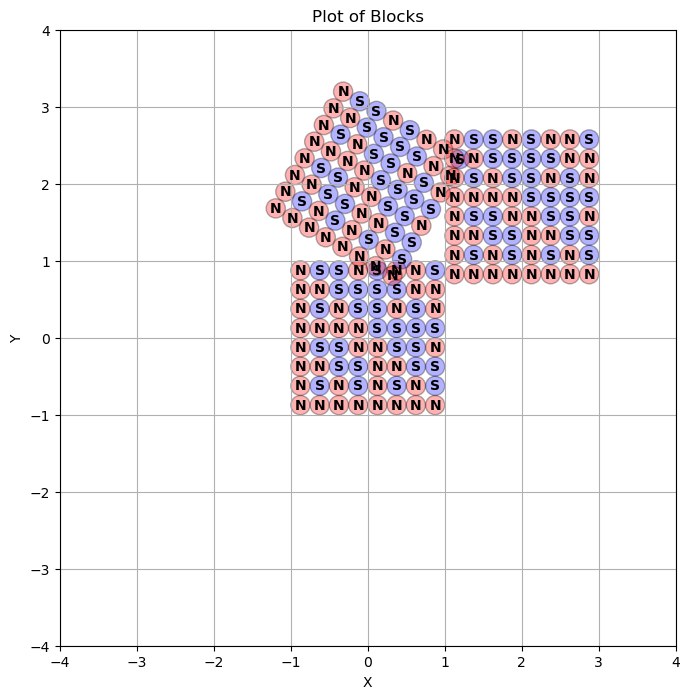

In [11]:
a = generators.gen_had_block(8)
b = a.clone()
c = b.clone()
b.rotate(30)
b.translate(torch.tensor([0, 2]))
c.translate(torch.tensor([2, 1.7]))
plot.plot_faces([a, b, c], zoom_factor=4)

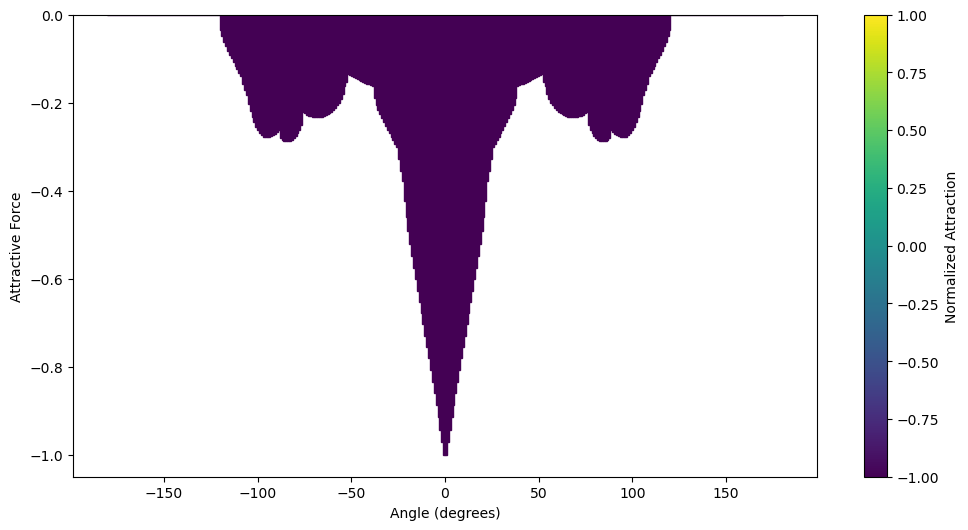

In [53]:
e = generators.gen_had_block(8)
f = e.mate()
plot.plot_rotation_attraction(a, b, num_angles=360)

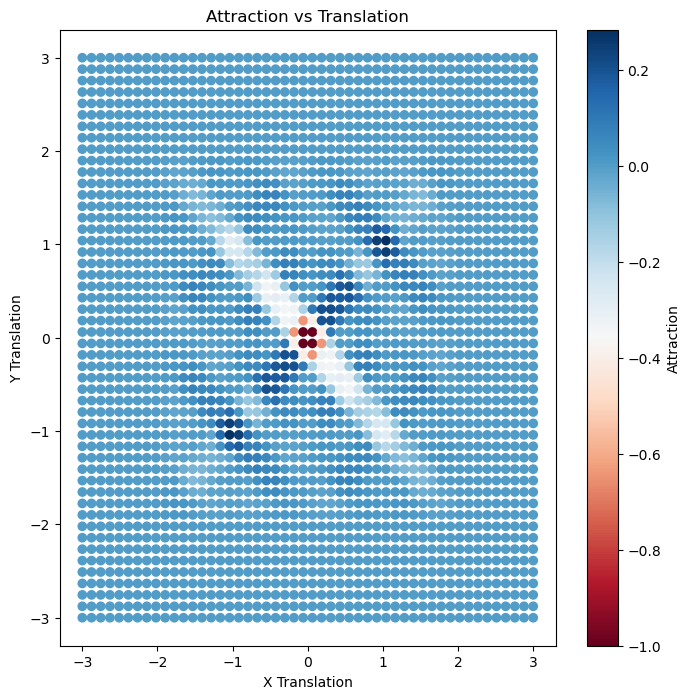

In [14]:
plot.plot_translation_attraction(e, f, 50, 50, lo=-3, hi=3)

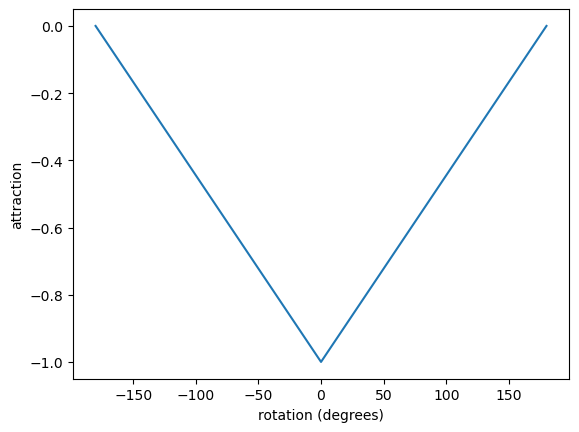

In [261]:
X, Y = [-180, 0, 180], [0, -1, 0]
plt.plot(X, Y)
plt.ylabel('attraction')
plt.xlabel('rotation (degrees)')
plt.show()

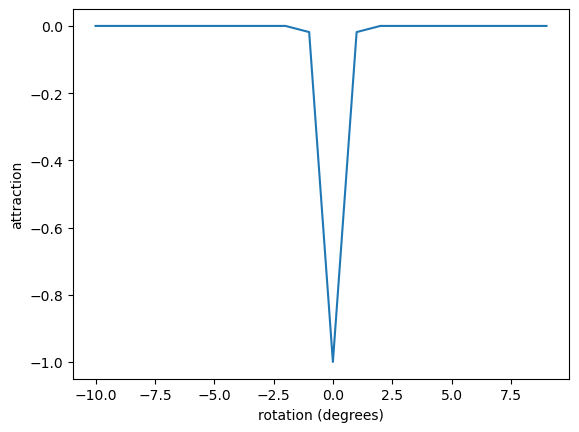

In [268]:
X = [i for i in range(-10, 10)]
Y = [-1 * math.exp(-4 * (x)**2) for x in X]
plt.plot(X, Y)
plt.ylabel('attraction')
plt.xlabel('rotation (degrees)')
plt.show()